In [1]:
!pip install numpy==1.23.5 nibabel scipy==1.9.3 scikit-image matplotlib
!pip install numpy-stl
!pip install libigl
!pip install --upgrade setuptools
!pip install git+https://github.com/skoch9/meshplot.git
!pip install plotly
!pip install mayavi
!pip install PyQt5
!pip install ipywidgets
!pip install ipyevents
!jupyter nbextension install --py mayavi --user
!jupyter nbextension enable --py mayavi --user

  Using cached numpy-1.23.5-cp310-cp310-win_amd64.whl (14.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.1
    Uninstalling numpy-1.22.1:
      Successfully uninstalled numpy-1.22.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
pymc3 3.11.5 requires numpy<1.22.2,>=1.15.0, but you have numpy 1.23.5 which is incompatible.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.9.3 which is incompatible.


  Cloning https://github.com/skoch9/meshplot.git to c:\users\administrator\appdata\local\temp\pip-req-build-qq8lddrh
  Resolved https://github.com/skoch9/meshplot.git to commit 725e4a7926a5f10888f0edd1762fecf9db751c56
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/skoch9/meshplot.git 'C:\Users\Administrator\AppData\Local\Temp\pip-req-build-qq8lddrh'


Installing C:\ProgramData\anaconda3\lib\site-packages\mayavi\tools/static -> mayavi
Up to date: C:\Users\Administrator\AppData\Roaming\jupyter\nbextensions\mayavi\x3d\LICENSE.txt
Up to date: C:\Users\Administrator\AppData\Roaming\jupyter\nbextensions\mayavi\x3d\x3dom.css
Up to date: C:\Users\Administrator\AppData\Roaming\jupyter\nbextensions\mayavi\x3d\x3dom.js
- Validating: ok

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable mayavi --user --py
    
Enabling notebook extension mayavi/x3d/x3dom...
      - Validating: ok


In [2]:
from skimage import measure
from skimage.morphology import dilation, erosion, closing, square, ball,area_closing
import nibabel as nib
import numpy as np
from scipy.ndimage import binary_fill_holes
# from scipy.ndimage import binary_dilation, binary_fill_holes, binary_erosion
from skimage.measure import marching_cubes
from stl import mesh
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

invivo_filled_res_3 = "invivo_filled/03/filled_mesh_1.mgz"
# Load the MRI volume
mri_volume = nib.load(invivo_filled_res_3)
# Load surface mesh using nibabel freesurfer read_geometry
# vertices, faces = nib.freesurfer.read_geometry(invivo_filled_res_3)

# Get the data as a numpy array
mri_data = mri_volume.get_fdata()

In [3]:
# Create data array
# pad = 10
# mask_data_3 = np.zeros(np.asarray(mri_data.shape) +2*pad)
# mask_data_3[pad:-pad, pad:-pad, pad:-pad] = mri_data>0.5
# print(mask_data_3.shape)
print(mri_data.shape)

(255, 614, 398)


Text(0.5, 1.0, 'Central Slice After Filling Res=3')

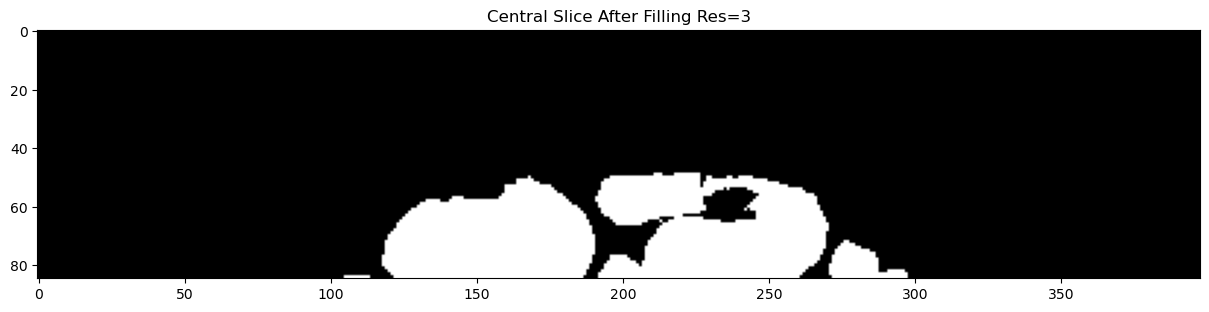

In [4]:
fig, axs = plt.subplots(1,figsize=(15, 15))

axs.imshow(mri_data[:85,len(mri_data)//2,:], cmap="gray", aspect='equal')
axs.set_title('Central Slice After Filling Res=3')

In [5]:
# Divide the volume into three subslice volumes
subslice_volumes = np.array_split(mri_data, 3)

In [6]:
len(subslice_volumes[0])

85

In [7]:
len(subslice_volumes[1])

85

In [8]:
len(subslice_volumes[2])

85

Radius 1: 4
Volume = 1
Dilating
Filling Holes
Area closing
Radius 2: 2
Volume = 2
Dilating
Filling Holes
Area closing
Radius 3: 2
Volume = 3
Dilating
Filling Holes
Area closing


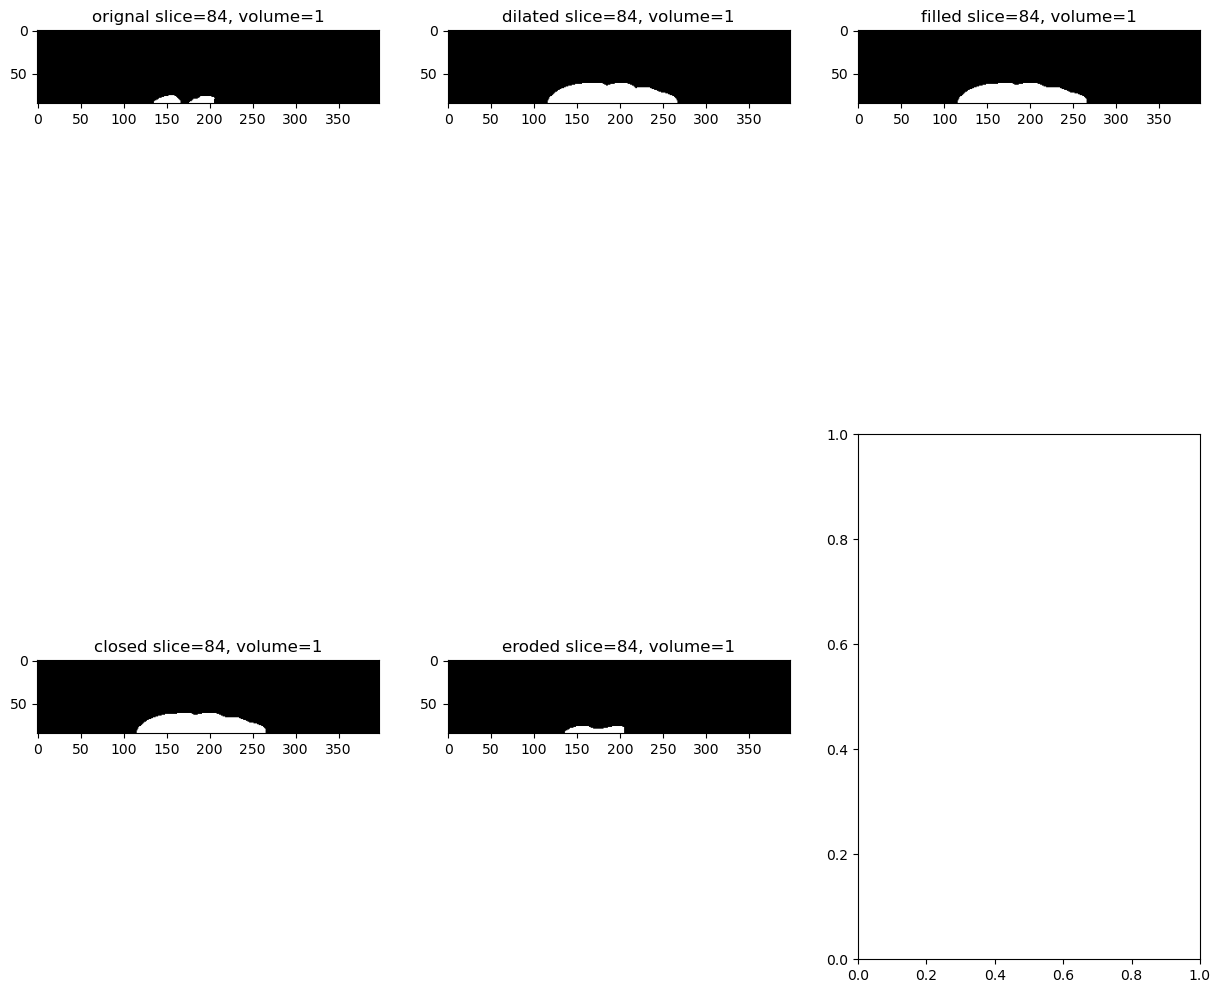

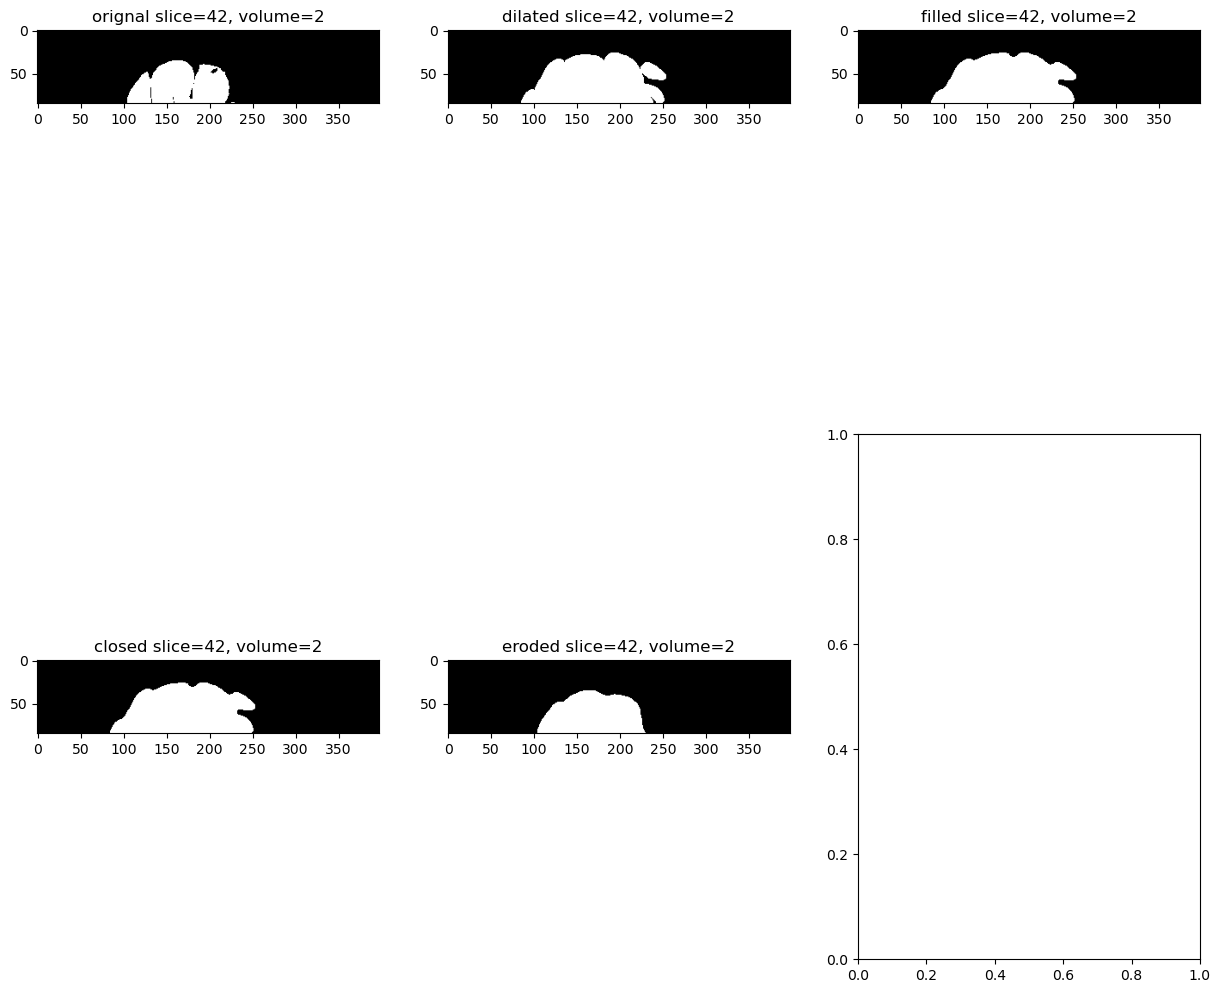

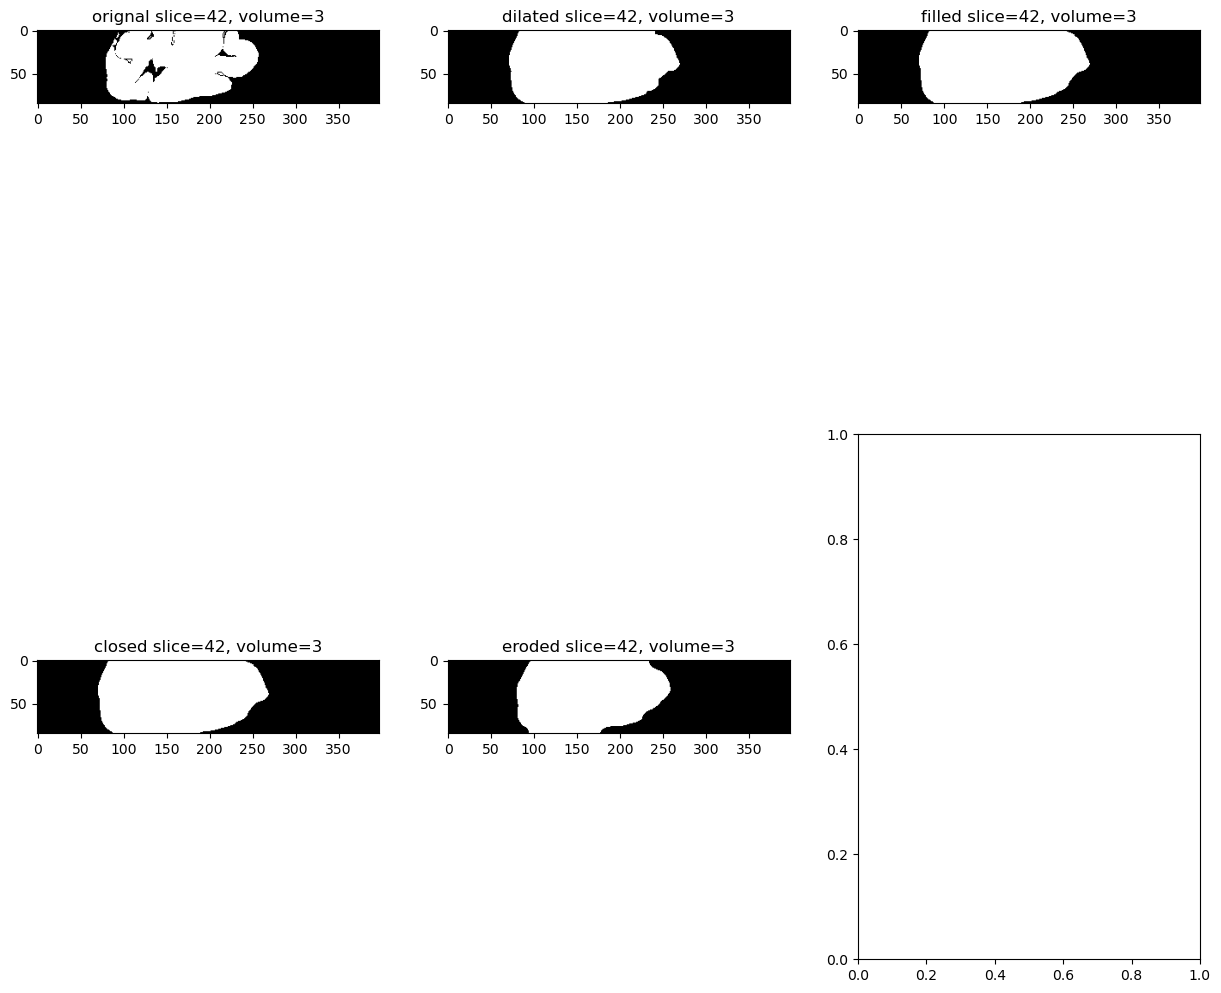

In [9]:
%matplotlib inline
# max_slices = 0
# Perform dilation, filling, area closing and erosion on each subslice volume
for i in range(len(subslice_volumes)):
    max_slices = len(subslice_volumes[i]) 
    # Random ball radius for dilation, closing and erosion operations
    radius = np.random.randint(1, 5)
    print(f'Radius {i+1}:',radius)
    print(f'Volume = {i+1}')
    ball_radius = ball(radius/0.3)
    
    # Dilation
    print('Dilating')
    dilated = dilation(subslice_volumes[i], ball_radius)
    
    # Filling
    print('Filling Holes')
    filled = closing(dilated, ball_radius)
    filled = binary_fill_holes(filled)
    
    # Area Closing
    print('Area closing')
    closed = area_closing(filled, 8, connectivity=1)
    
    # Erosion
    eroded = erosion(closed, ball_radius)
    if i==0:
        fig, axs = plt.subplots(2, 3,figsize=(15,15))
        # Plot a slice from each subvolume to show the difference
        axs[0][0].set_title(f"orignal slice={max_slices-1}, volume={i+1}")
        axs[0][0].imshow(subslice_volumes[i][:,max_slices-1,:], cmap='gray', aspect='equal')
        axs[0][1].set_title(f"dilated slice={max_slices-1}, volume={i+1}")
        axs[0][1].imshow(dilated[:,max_slices-1,:], cmap='gray', aspect='equal')
        axs[0][2].set_title(f"filled slice={max_slices-1}, volume={i+1}")
        axs[0][2].imshow(filled[:,max_slices-1,:], cmap='gray', aspect='equal')
        axs[1][0].set_title(f"closed slice={max_slices-1}, volume={i+1}")
        axs[1][0].imshow(closed[:,max_slices-1,:], cmap='gray', aspect='equal')
        axs[1][1].set_title(f"eroded slice={max_slices-1}, volume={i+1}")
        axs[1][1].imshow(eroded[:,max_slices-1,:], cmap='gray', aspect='equal')
        

    else:
        fig, axs = plt.subplots(2, 3,figsize=(15,15))
        # Plot a slice from each subvolume to show the difference
        axs[0][0].set_title(f"orignal slice={max_slices//2}, volume={i+1}")
        axs[0][0].imshow(subslice_volumes[i][:,max_slices//2,:], cmap='gray', aspect='equal')
        axs[0][1].set_title(f"dilated slice={max_slices//2}, volume={i+1}")
        axs[0][1].imshow(dilated[:,max_slices//2,:], cmap='gray', aspect='equal')
        axs[0][2].set_title(f"filled slice={max_slices//2}, volume={i+1}")
        axs[0][2].imshow(filled[:,max_slices//2,:], cmap='gray', aspect='equal')
        axs[1][0].set_title(f"closed slice={max_slices//2}, volume={i+1}")
        axs[1][0].imshow(closed[:,max_slices//2,:], cmap='gray', aspect='equal')
        axs[1][1].set_title(f"eroded slice={max_slices//2}, volume={i+1}")
        axs[1][1].imshow(eroded[:,max_slices//2,:], cmap='gray', aspect='equal')
        

    # Recombine the subslice volumes into a single volume again
    if i == 0:
        combined_volume = eroded.copy()
    else:
        combined_volume = np.concatenate((combined_volume, eroded), axis=0)
    

In [10]:
# Save the combined volume as a nifti file
combined_volume_nifti = nib.Nifti1Image(combined_volume.astype(np.uint8), affine=np.eye(4))
nib.save(combined_volume_nifti, 'outsurfs/invivo_experiment_3.nii.gz')

In [11]:
combined_volume_data_3 = nib.load('outsurfs/invivo_experiment_3.nii.gz')

In [12]:
combined_volume_data_3.shape

(255, 614, 398)

<IPython.core.display.Javascript object>


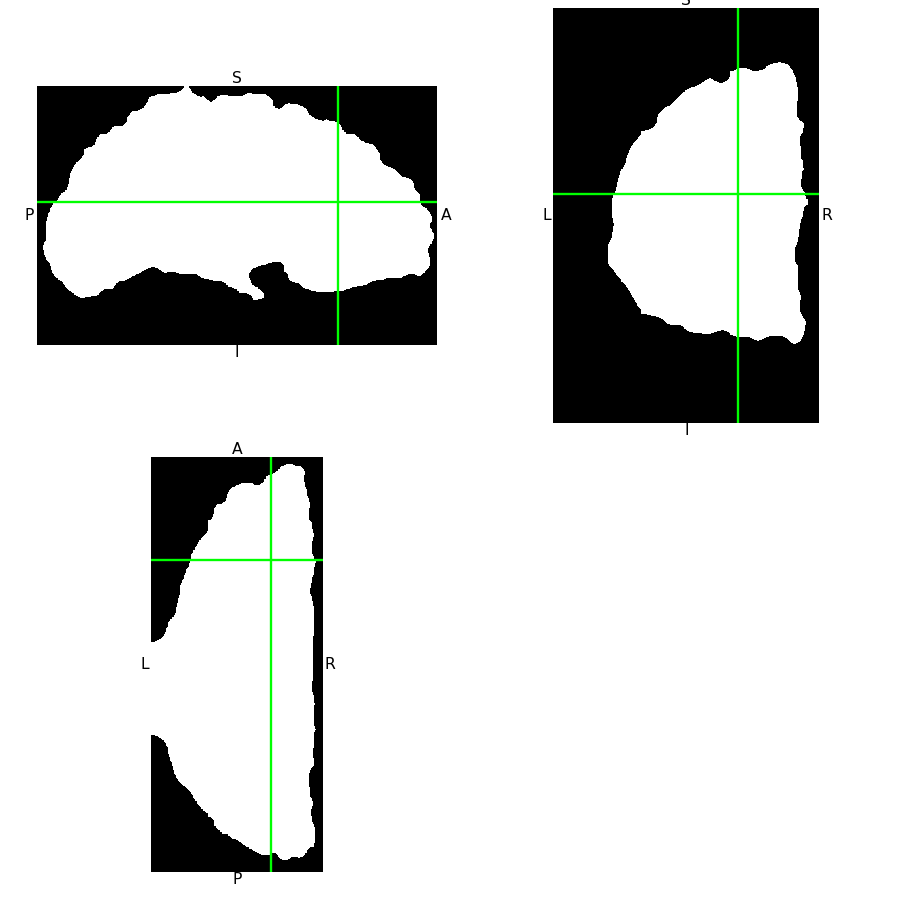

<OrthoSlicer3D: outsurfs/invivo_experiment_3.nii.gz (255, 614, 398)>

In [13]:
%matplotlib notebook
combined_volume_data_3.orthoview()

In [14]:
from scipy.ndimage.filters import gaussian_filter
def smooth_mesh(volume):
    volume_smoothed = gaussian_filter(volume, sigma=2)
    # Return the smoothed mesh
    return volume_smoothed

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13472\3134970742.py:1: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


In [15]:
def volume_to_mesh(volume):
   # Generate the mesh using marching cubes
    verts, faces, _, _ = marching_cubes(volume)

    return verts, faces

In [18]:
volume_smooth_3 = smooth_mesh(combined_volume_data_3.get_fdata())

In [19]:
verts_filled,faces_filled =volume_to_mesh(volume_smooth_3)

In [23]:
surface_mesh = mesh.Mesh(np.zeros(faces_filled.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces_filled):
    for j in range(3):
        surface_mesh.vectors[i][j] = verts_filled[f[j], :]

surface_mesh.save('outsurfs/invivo_experiment_surface_mesh_3.stl')

In [25]:
import igl # Read Triangular meshes
# Ploting libraries
import plotly.io as pio
pio.renderers.default = "sphinx_gallery"
import meshplot as mp # Visualization

In [26]:
# # Load the remeshed obj
v1, f1 = igl.read_triangle_mesh('outsurfs/invivo_experiment_surface_mesh_3.stl')

# Visualization Shading options
shading = {"flat":True, # Flat or smooth shading of triangles
           "wireframe":True, "wire_width": 0.05, "wire_color": "green", # Wireframe rendering
           "width": 600, "height": 600, # Size of the viewer canvas
           "antialias": True, # Antialising, might not work on all GPUs
           "scale": 2.0, # Scaling of the model
           "side": "DoubleSide", # FrontSide, BackSide or DoubleSide rendering of the triangles
           "background": "#ffffff", # Background color of the canvas
           "line_width": 1.5, "line_color": "yellow", # Line properties of overlay lines
           "bbox": False, # Enable plotting of bounding box
           "point_color": "red", "point_size": 0.01 # Point properties of overlay points
          }

# Visualization
p = mp.plot(v1,f1, return_plot= True, c=v1[:, 1], shading=shading)

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(127.0, 30…

In [28]:
from mayavi import mlab

In [29]:
mlab.triangular_mesh(verts_filled[:, 0], verts_filled[:, 1], verts_filled[:, 2], faces_filled)
mlab.show()

In [ ]:
# # Convert the volume into a mesh using marching cubes algorithm
# verts, faces, normals, values = measure.marching_cubes(combined_volume)

# # Save the mesh as an stl file
# mesh = trimesh.Trimesh(vertices=verts - np.array([128., 128., 128.]), faces=faces)
# mesh.export('/outsurfs/invivo_experiment_mesh.stl')